## Imports

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from somperf.metrics import *
from somperf.utils.topology import rectangular_topology_dist
from scipy.stats import zscore
import optuna
import numpy as np

In [88]:
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1') 
data = df.iloc[:,:-1].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   meanR   5656 non-null   float64
 1   meanG   5656 non-null   float64
 2   meanB   5656 non-null   float64
 3   stdR    5656 non-null   float64
 4   stdG    5656 non-null   float64
 5   stdB    5656 non-null   float64
 6   skewR   5656 non-null   float64
 7   skewG   5656 non-null   float64
 8   skewB   5656 non-null   float64
 9   kurR    5656 non-null   float64
 10  kurG    5656 non-null   float64
 11  kurB    5656 non-null   float64
 12  entR    5656 non-null   float64
 13  entG    5656 non-null   float64
 14  entB    5656 non-null   float64
 15  Class   5656 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 707.1 KB


In [90]:
df.head(5)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,20.894382,5.260718,6.854176,17.015386,20.055104,23.933250,46.994451
meanG,5656.0,18.023509,3.885058,6.259336,15.462487,17.823574,20.508286,37.866338
meanB,5656.0,5.562521,1.572465,1.823841,4.469088,5.206807,6.298417,14.023399
stdR,5656.0,49.518673,9.091646,23.889681,42.518804,48.737837,55.533851,78.573397
stdG,5656.0,43.181128,5.799811,21.816707,39.565446,43.274979,47.258675,63.912439
stdB,5656.0,16.216090,2.737406,7.831019,14.261454,15.830328,17.684630,29.260652
skewR,5656.0,2.164332,0.298941,1.154889,1.962475,2.147151,2.337118,3.582313
skewG,5656.0,2.232326,0.340901,1.203163,2.003130,2.188874,2.405244,3.997579
skewB,5656.0,3.745612,0.647198,1.944842,3.304125,3.764237,4.170742,7.961952
kurR,5656.0,3.208423,1.533598,-0.531692,2.161075,3.023438,3.989808,12.941081


In [92]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
Class    0
dtype: int64

## EDA

In [93]:
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1') 
data = df.iloc[:,:-1]

In [94]:
variances = df.var()

max_variance_feature = variances.idxmax()  
max_variance_value = variances.max()    

print(f"Fitur dengan varians terbesar: {max_variance_feature} (Varians: {max_variance_value:.2f})")

print("\nVarians semua fitur:")
print(variances.sort_values(ascending=False))

Fitur dengan varians terbesar: stdR (Varians: 82.66)

Varians semua fitur:
stdR     82.658034
kurB     41.401724
stdG     33.637811
meanR    27.675158
meanG    15.093673
stdB      7.493391
kurG      3.649373
Class     2.910913
meanB     2.472647
kurR      2.351922
skewB     0.418866
skewG     0.116213
skewR     0.089366
entB      0.027264
entG      0.023745
entR      0.022690
dtype: float64


In [95]:
df_normal = df[['stdR', 'kurB']].copy()

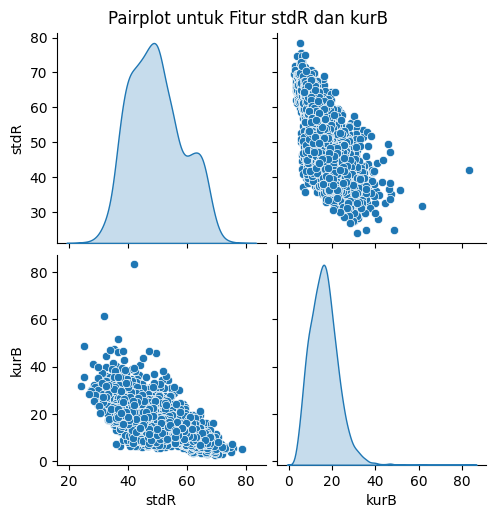

In [ ]:
sns.pairplot(df_normal, diag_kind='kde')
plt.suptitle("Pairplot untuk Fitur stdR dan kurB", y=1.02)
plt.show()

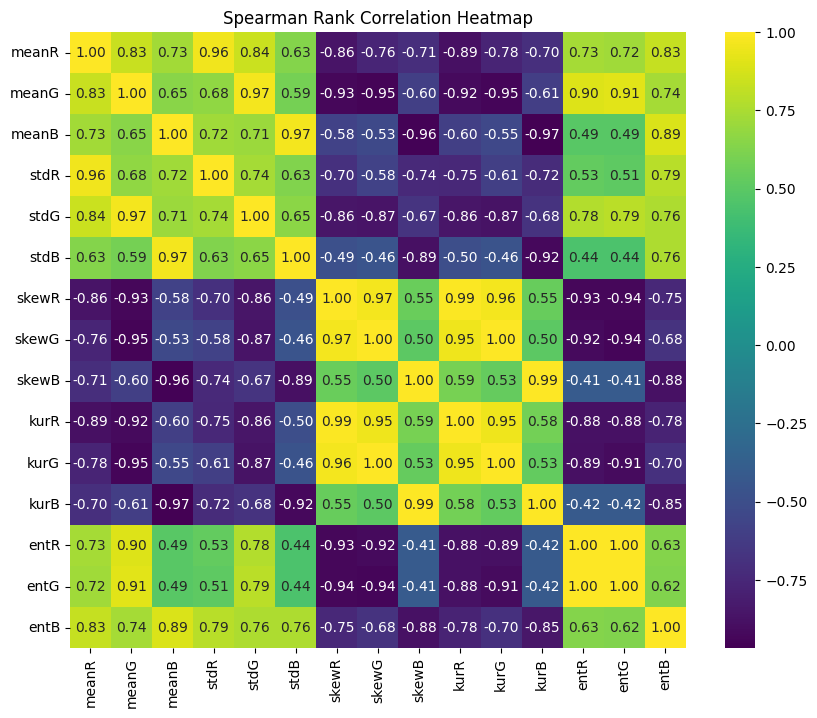

In [139]:
spearman_correlation_matrix = data.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)
plt.title("Spearman Rank Correlation Heatmap")
plt.show()


In [98]:
def cek_outlier(data):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12))
    fig.suptitle('Boxplots tiap fitur')

    features = data.columns[:-1]
    for i, feature in enumerate(features):
        sns.boxplot(data=data, y=feature, ax=axes[i // 5, i % 5])
        axes[i // 5, i % 5].set_title(f'{feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

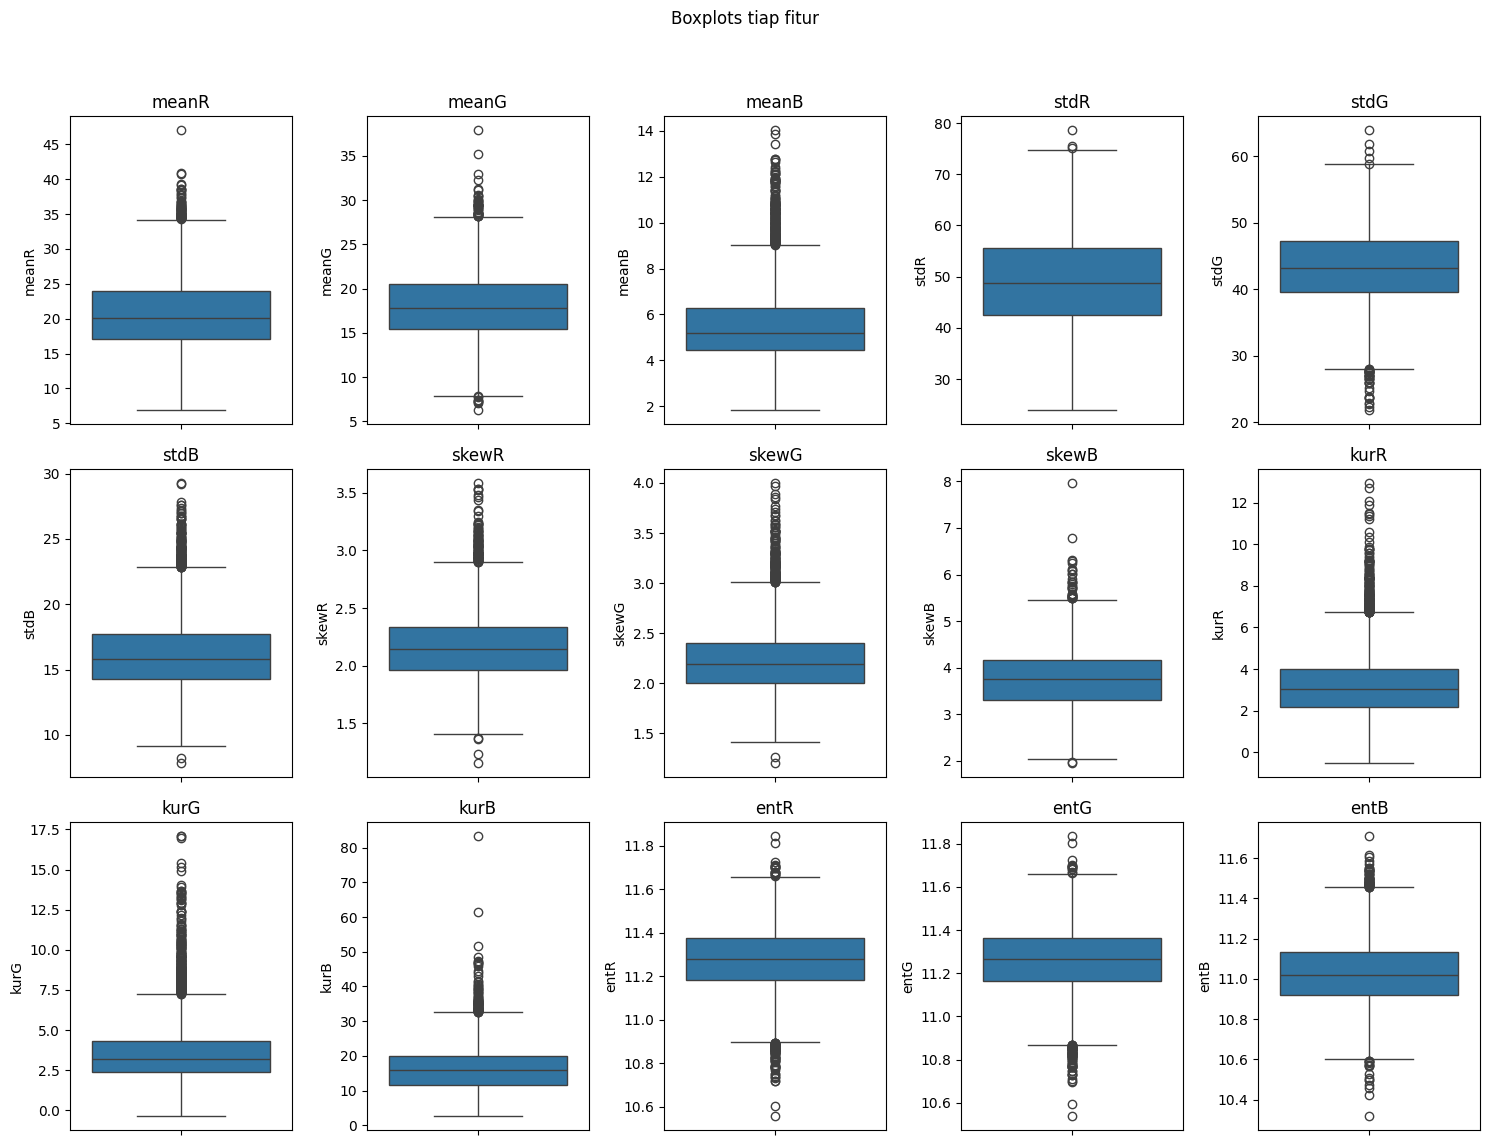

In [99]:
cek_outlier(df)

In [138]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Class')

df_standardized = df[numerical_cols].apply(zscore)

outlier_count = ((df_standardized > 3) | (df_standardized < -3)).sum()
total_outliers = outlier_count.sum()
proportion_outliers = total_outliers / (df_standardized.shape[0] * df_standardized.shape[1])

print(f"Jumlah Proporsi Outlier: {proportion_outliers:.2%}")

Jumlah Proporsi Outlier: 0.72%


## Preprocessing

In [100]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(data.copy())
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

df_scaled.head(1)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB
0,0.262619,0.37327,0.223369,0.309574,0.497217,0.345519,0.381338,0.327242,0.373931,0.246299,0.188223,0.202234,0.586973,0.589226,0.392681


In [102]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,0.349779,0.131058,0.0,0.253142,0.328870,0.425485,1.0
meanG,5656.0,0.372201,0.122918,0.0,0.291174,0.365876,0.450816,1.0
meanB,5656.0,0.306460,0.128895,0.0,0.216831,0.277302,0.366782,1.0
stdR,5656.0,0.468677,0.166259,0.0,0.340670,0.454398,0.578676,1.0
stdG,5656.0,0.507520,0.137777,0.0,0.421628,0.509749,0.604384,1.0
stdB,5656.0,0.391284,0.127739,0.0,0.300072,0.373283,0.459812,1.0
skewR,5656.0,0.415850,0.123152,0.0,0.332693,0.408772,0.487030,1.0
skewG,5656.0,0.368293,0.121994,0.0,0.286273,0.352743,0.430173,1.0
skewB,5656.0,0.299275,0.107560,0.0,0.225903,0.302370,0.369928,1.0
kurR,5656.0,0.277605,0.113829,0.0,0.199867,0.263875,0.335603,1.0


In [117]:
X_train = df_scaled
y_train = df['Class']

In [152]:
def plot_relationship(datax, datay):

    selected_features = datax.columns[:6]

    sns.pairplot(pd.concat([datax[selected_features], datay.reset_index(drop=True)], axis=1), diag_kind='kde', hue=y_train.name)
    plt.suptitle("Plot hubungan antar fitur yang dipilih", y=1.02)
    plt.show()

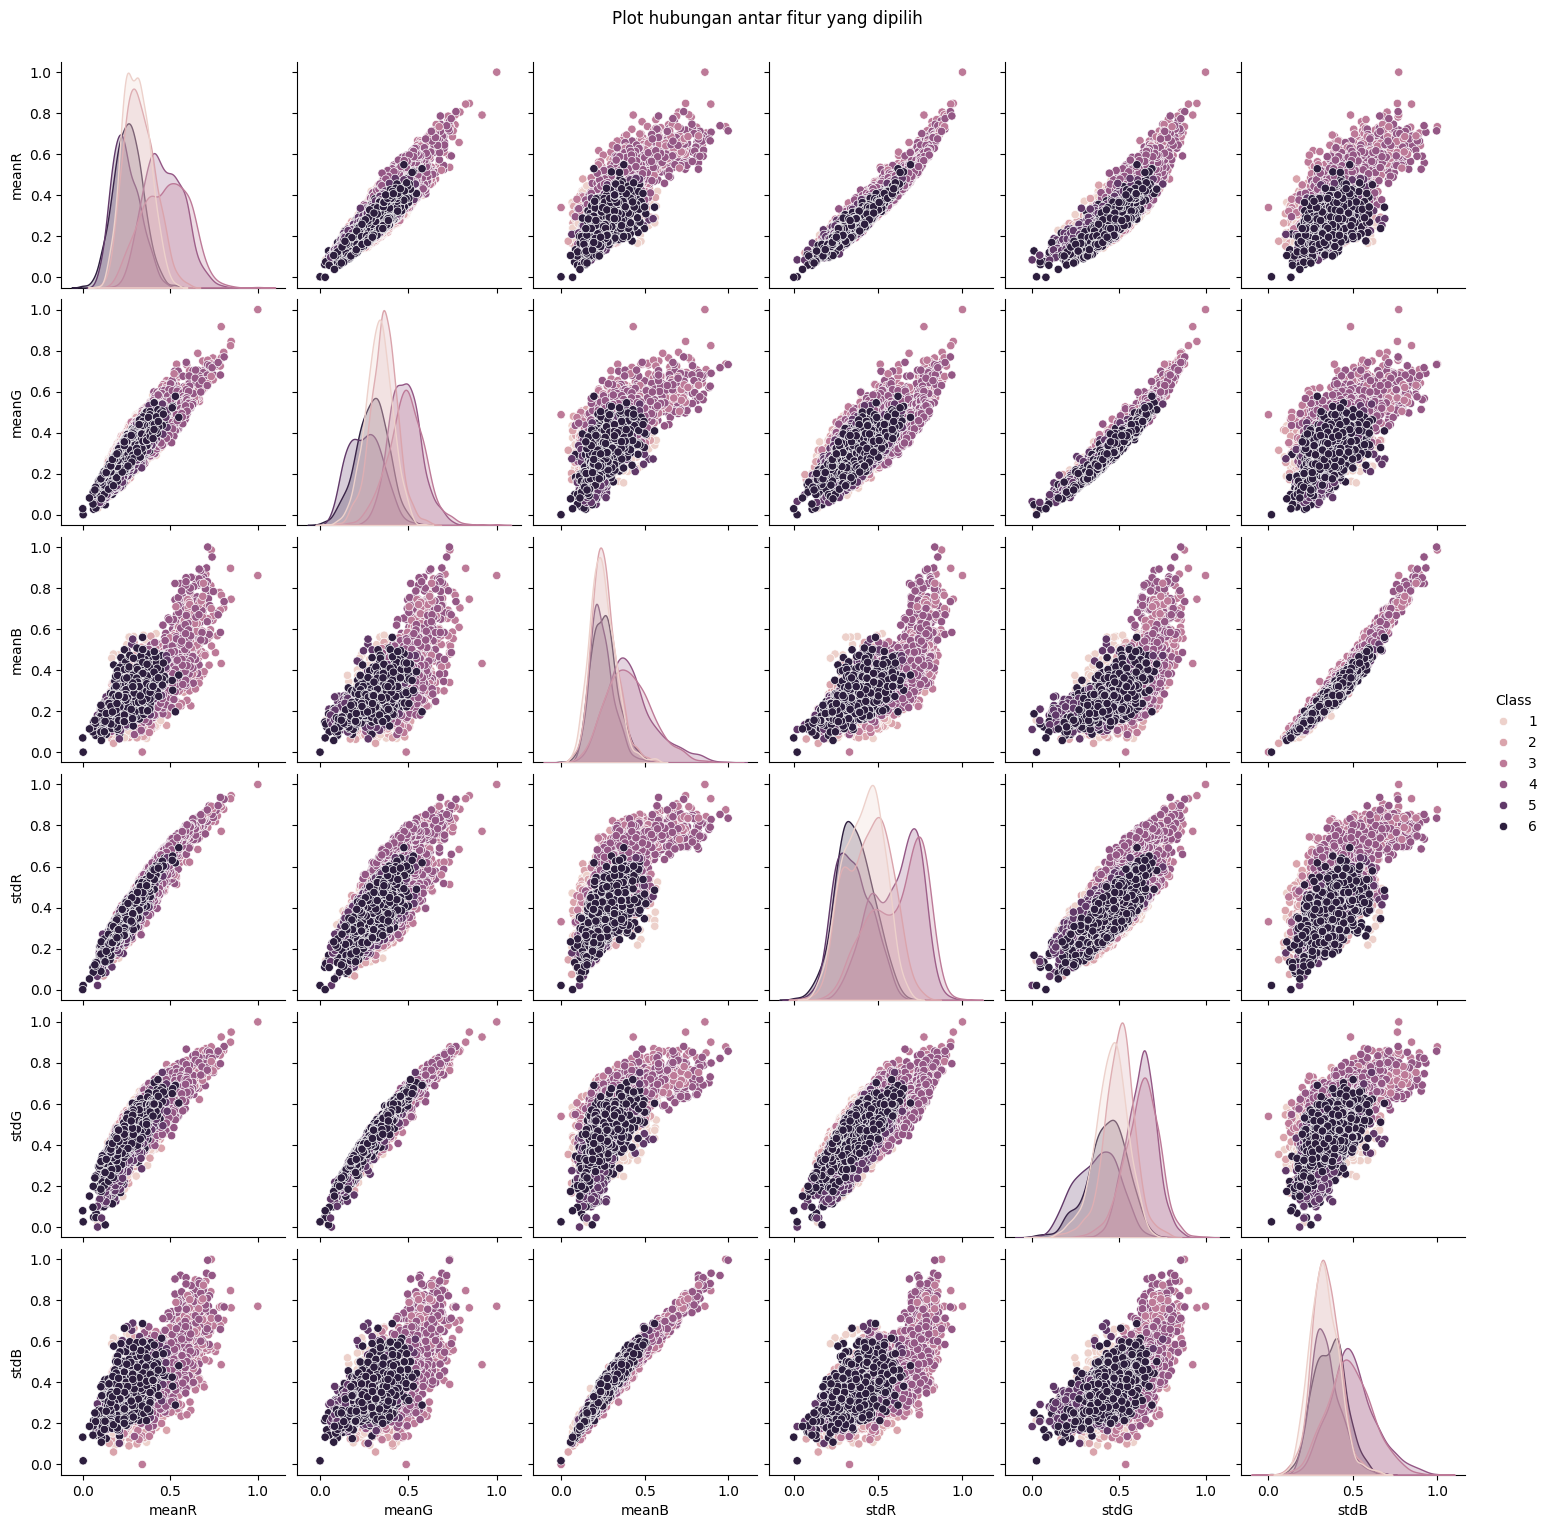

In [153]:
plot_relationship(X_train, y_train)

## Dimension Reduction

In [106]:
def plot_dimension(data):
    plt.figure(figsize=(16, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=y_train, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(1, 7), label='Class')
    plt.title("Visualization of Classes")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

In [110]:
def spearman_heatmap(data):
    spearman_correlation_matrix = data.corr(method='spearman')

    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)
    plt.title("Spearman Rank Correlation Heatmap")
    plt.show()

### Normal

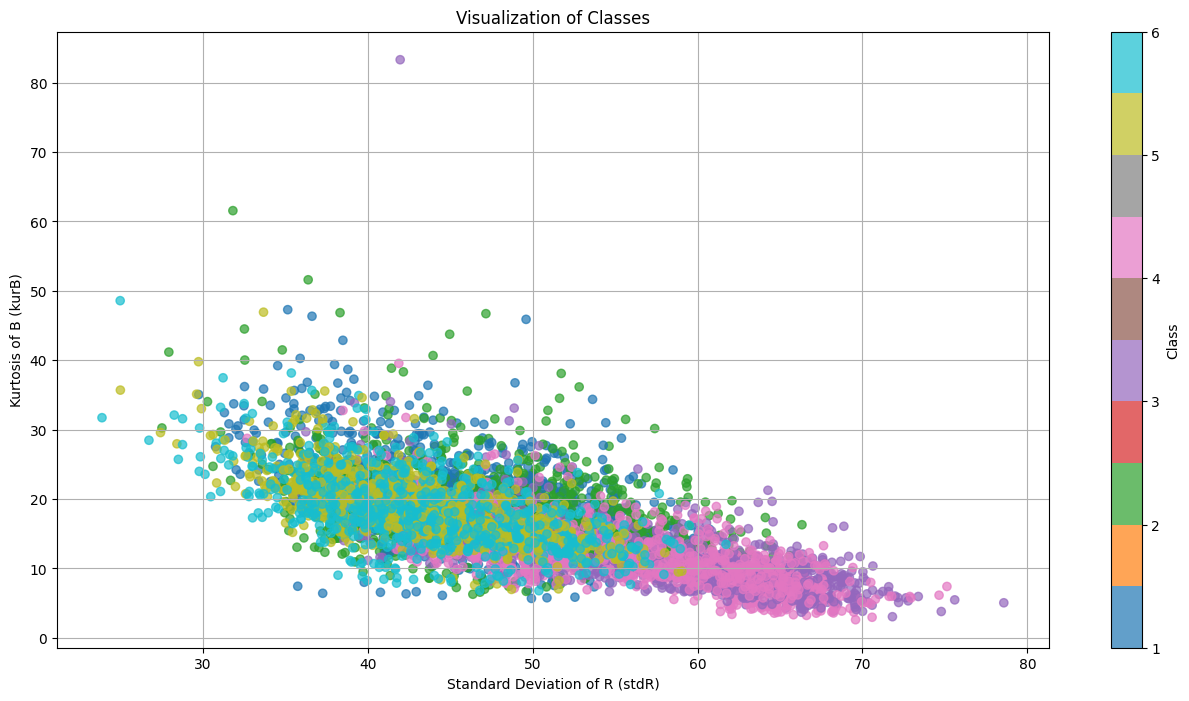

In [158]:
df_normal = df[['stdR', 'kurB', 'Class']].copy()
plt.figure(figsize=(16, 8))
scatter = plt.scatter(df_normal['stdR'], df_normal['kurB'], c=df_normal['Class'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(1, 7), label='Class')
plt.title("Visualization of Classes")
plt.xlabel("Standard Deviation of R (stdR)")
plt.ylabel("Kurtosis of B (kurB)")
plt.grid(True)
plt.show()

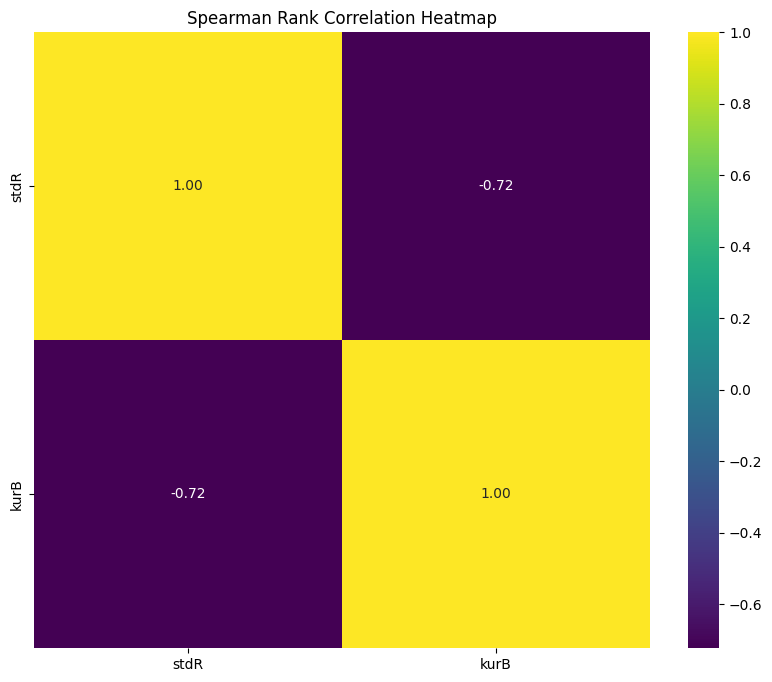

In [163]:
df_normal = df_normal.drop(columns=['Class'])
spearman_heatmap(df_normal)

### PCA

In [107]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

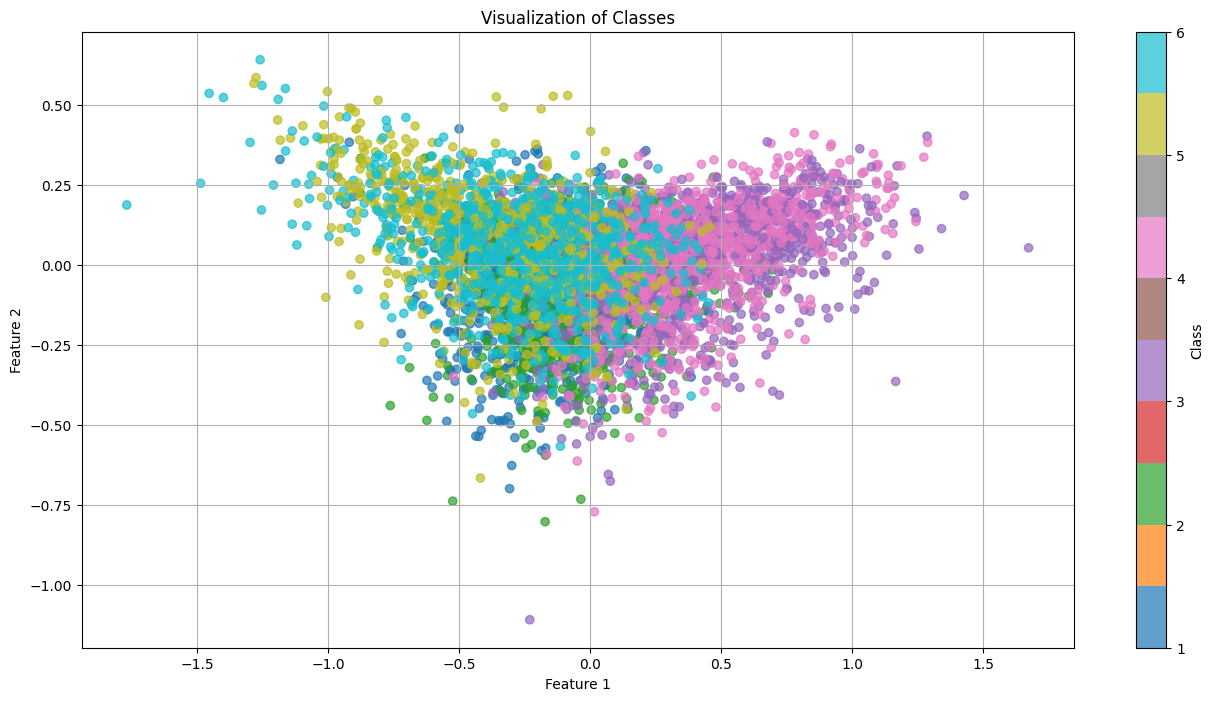

In [108]:
plot_dimension(X_pca)

In [109]:
X_pca = pd.DataFrame(X_pca)

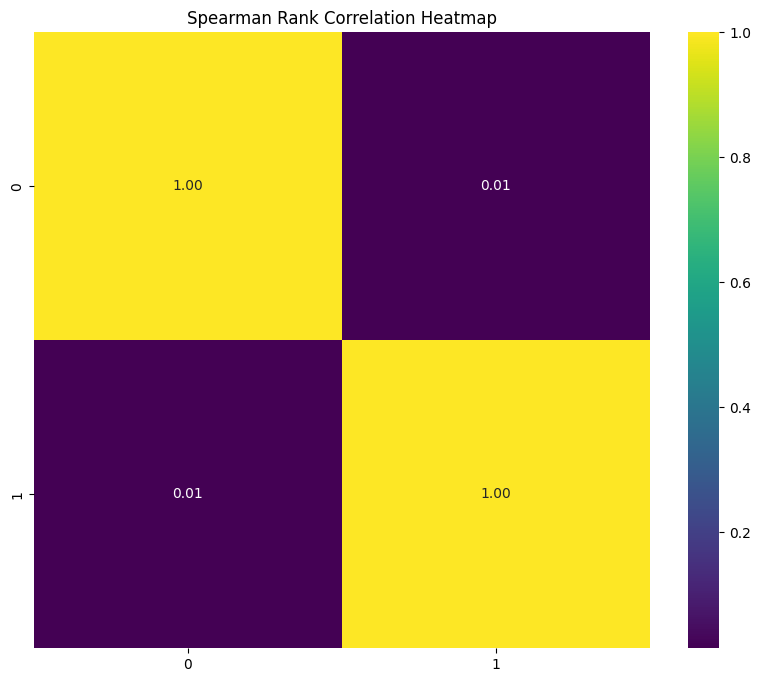

In [111]:
spearman_heatmap(X_pca)

### TSNE

In [112]:
df_scaled.head(1)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB
0,0.262619,0.37327,0.223369,0.309574,0.497217,0.345519,0.381338,0.327242,0.373931,0.246299,0.188223,0.202234,0.586973,0.589226,0.392681


In [113]:
tsne = TSNE(n_components=2, perplexity=21, n_iter=1269, random_state=42, learning_rate = 18.896459784706366)
X_tsne = tsne.fit_transform(X_train)

d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


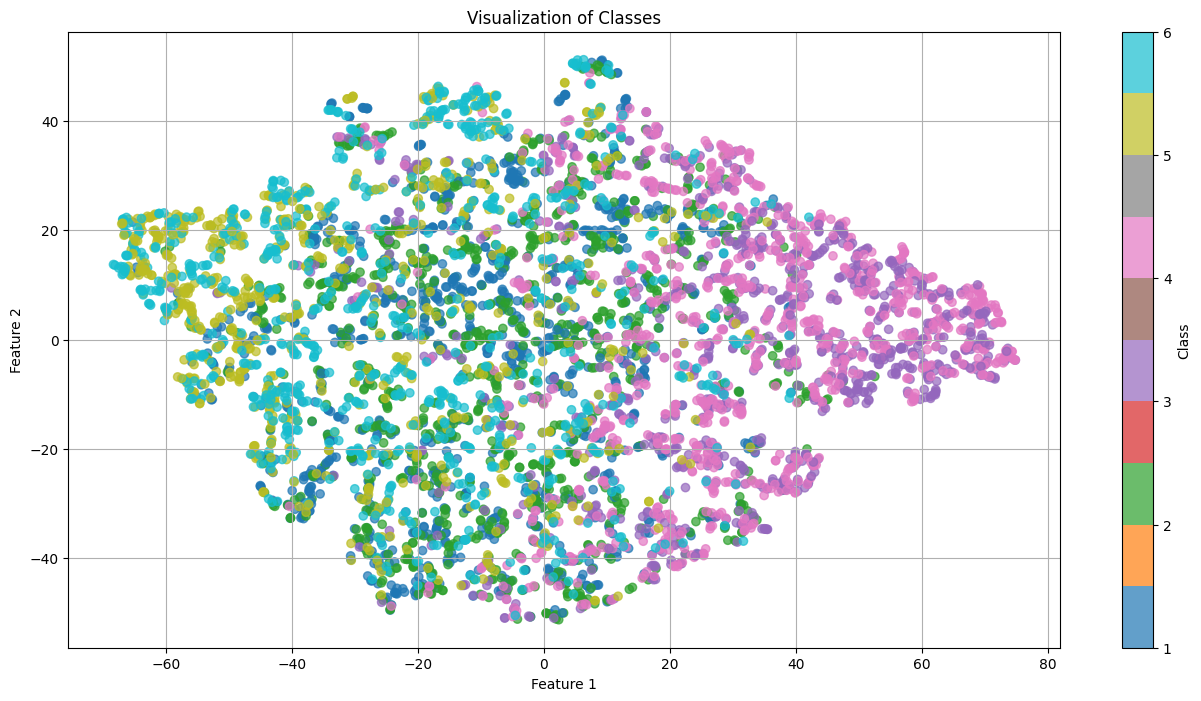

In [114]:
plot_dimension(X_tsne)

In [115]:
X_tsne = pd.DataFrame(X_tsne)

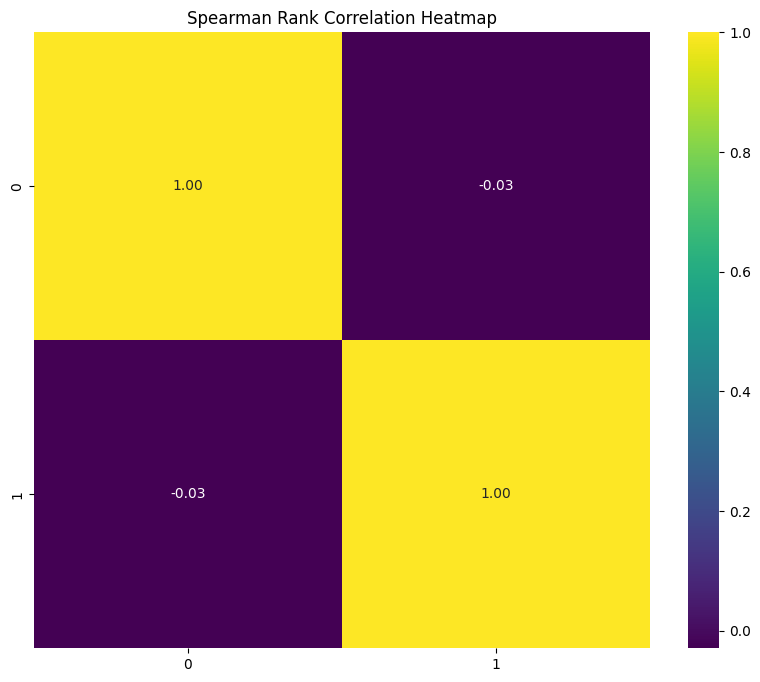

In [116]:
spearman_heatmap(X_tsne)